# <font color=blue>Chapter 9 Languages and Grammars Exercises</font>
## <font color=blue>Prepare</font>

Answers available on request.


In [ ]:
#@title Run this block first to enable seeing Hints. {display-mode: "form"}
from IPython.display import Markdown

## <font color=red>9.1 Help or Hurt</font>


No exercises.


## <font color=red>9.2 Order Matters</font>


No exercises.


## <font color=red>9.3 Logic, Beads, and Strings</font>


No exercises.


## <font color=red>9.4 Common Mold</font>


No exercises.


## <font color=red>9.5 Language Language</font>


No exercises.


## <font color=red>9.6 Grammar Composition</font>


Here is the code from Figure 9.2 Finding a random derivation:


In [ ]:
from random import choice

terminals = {'a', 'the', 'hungry', 'sleepy', 'cat', 'dog',
             'chases', 'runs', 'slowly', 'quickly'}

productions = {
  'SENTENCE': [['NOUN_PHRASE', 'VERB_PHRASE', 'NOUN_PHRASE'],
               ['NOUN_PHRASE', 'VERB_PHRASE']],
  'NOUN_PHRASE': [['ARTICLE', 'ADJECTIVE', 'NOUN'],
                  ['ARTICLE', 'NOUN']],
  'VERB_PHRASE': [['VERB', 'ADVERB'], ['VERB']],
  'ARTICLE': ['a', 'the'],
  'ADJECTIVE': ['hungry', 'sleepy'],
  'NOUN': ['cat', 'dog'],
  'VERB': ['chases', 'runs'],
  'ADVERB': ['slowly', 'quickly']}

nonterminals = set(productions.keys())

G = {'nonterminals': nonterminals,
     'terminals': terminals,
     'start_symbol': 'SENTENCE',
     'productions': productions}

def nonterminals_remain(grammar, segment):
  nonterminals = grammar['nonterminals']
  return any(map(lambda s: s in nonterminals, segment))

def derive(grammar, LHS):
  RHS = grammar['productions'][LHS]
  if isinstance(RHS[0], list):
    return choice(RHS)
  else:
    return [choice(RHS)]

def find_derivation(grammar):
  derivation = [grammar['start_symbol']]
  terminals = grammar['terminals']
  while nonterminals_remain(grammar, derivation):
    print(' '.join(derivation))
    derive_one = []
    for i in range(len(derivation)):
      symbol = derivation[i]
      if symbol in terminals:
        derive_one.append(symbol)
      else:
        derive_one.extend(derive(grammar, symbol))
        derive_one.extend(derivation[i+1:])
        break
    derivation = derive_one
  return ' '.join(derivation)

In [ ]:
print(find_derivation(G))

### Exercise 9.6.1


Run the above `print(find_derivation(G))` code block several times.


How many times does it take you to derive five different sentences?


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''It will be different for everybody.'''))


### Exercise 9.6.2


Combinatorially speaking, how many different sentences can eventually be derived by repeated calls to `find_derivation(G)`?


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Count how many choices there are for each Nonterminal and for each Terminal.

Use the sum rule and the product rule.
'''))


### Exercise 9.6.3


With this simple grammar is there a derivation for the following sentence?


`the hungry sleepy dog runs`


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Look at the `ADJECTIVE` rule closely.
'''))


### Exercise 9.6.4

Moving towards a more sophisticated grammar, what rules would need to be changed or added to generate this sentence?


`the quick brown fox jumps over the lazy dog`


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
What type of word is &ldquo;over&rdquo;? You will need to add three rules, and change
the `ADJECTIVE` rule like you had to do for Exercise 9.6.3.
'''))


## <font color=red>9.7 Parsing Up a Tree</font>


### Exercise 9.7.1


[Courtesy Peter Norvig](https://norvig.com/python-lisp.html), taken from the bottom of that document, there is a better way to implement a PSG --- the code below:


In [ ]:
"""Generate random sentences from a grammar.  The grammar
consists of entries that can be written as S = 'NP VP | S and S',
which gets translated to {'S': [['NP', 'VP'], ['S', 'and', 'S']]}, and
means that one of the top-level lists will be chosen at random, and
then each element of the second-level list will be rewritten; if a symbol is
not in the grammar it rewrites as itself.   The functions generate and
generate_tree generate a string and tree representation, respectively, of
a random sentence."""

import random

def Grammar(**grammar):
  "Create a dictionary mapping symbols to alternatives."
  for (cat, rhs) in grammar.items():
    grammar[cat] = [alt.split() for alt in rhs.split('|')]
  return grammar

grammar = Grammar(
  S   = 'NP VP | S and S',
  NP  = 'Art N | Name',
  VP  = 'V NP',
  Art = 'the | a | every | some',
  N   = 'man | ball | woman | table | dog | cat | wombat',
  V   = 'hit | took | saw | liked | greeted | remembered',
  Name= 'Alice | Bob | Carlos | Dan | Eve'
  )

def generate(symbol='S'):
  "Replace symbol with a random entry in grammar (recursively); join into a string."
  if symbol not in grammar:
    return symbol
  else:
    return ' '.join(map(generate, random.choice(grammar[symbol])))

def generate_tree(symbol='S'):
  "Replace symbol with a random entry in grammar (recursively); return a tree."
  if symbol not in grammar:
    return symbol
  else:
    return {symbol: [generate_tree(x) for x in random.choice(grammar[symbol])]}

In [ ]:
print(generate())

In [ ]:
print(generate_tree())

Generate three sentences and three trees with this grammar.

Now let `S` be short for `SENTENCE`, `NP` for `NOUN_PHRASE`,
`VP` for `VERB_PHRASE`, `ART` for `ARTICLE`, `ADJ` for `ADJECTIVE`,
`N` for `NOUN`, `V` for `VERB`, and `ADV` for `ADVERB`.


Use the code


`grammar = Grammar(S = 'NP VP NP | NP VP',)`


as a starting point. Extend it to match the grammar found in Section 9.6.


Generate three more sentences and three more trees with this grammar.

In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
This is straightforward, but you should make sure you understand how Norvig's code works.
'''))

### Exercise 9.7.2


To help with the syntax-tree building process, please use [this tool](http://www.ironcreek.net/phpsyntaxtree/), whose so-called *labelled bracket notation* is just the tree-as-nested-list representation, only without the commas.


Build a parse tree for


`the quick brown fox jumps over the lazy dog`.


Include a picture and the list representation as your answer.


[Here is an example](https://byui-cse.github.io/cse280-course/images/simple-phrase.png) of a picture of a parse tree created by this tool.

In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Use the extended PSG you created in Exercise 9.6.4.
'''))

### Exercise 9.7.3


Build parse trees for the following sentences:


1. `a cat chases a hungry dog`.
2. `the dog runs quickly`.
3. `the sleepy dog chases quickly a hungry cat`.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Use the same approach you did for Exercise 9.7.2.
'''))

## <font color=red>9.8 Moving Closer to Useful</font>

### Exercise 9.8.1

Implement the PSG you get by combining the four rules for building propositions seen in Section 2.5 (Rules to Build By) with the five rules in the grammar for matching parentheses. You may end up with more than nine rules.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Use the Norvig code and generate lots of different logical propositions that use parentheses for grouping.
'''))

## <font color=red>9.9 Irregular</font>


No exercises.


## <font color=red>9.10 Regular</font>


No exercises.


## <font color=red>9.11 Star Power</font>


No exercises.


## <font color=red>9.12 State Machinery</font>


No exercises.


## <font color=red>9.13 Recognition</font>


### Exercise 9.13.1


Add a state and the necessary transitions to make the machine in this figure a valid state machine.

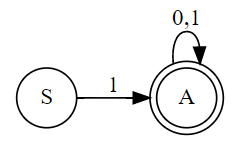


In [ ]:
#@title Hint1{display-mode: "form"}
display(Markdown('''
Remember the *very important rule*?
'''))

In [ ]:
#@title Hint2{display-mode: "form"}
display(Markdown('''
Each node must have a 0 and a 1 coming out of it. This will require a reject state, which you can label **R**
'''))

### Exercise 9.13.2


Compare and contrast the `1(0` $\cup$ `1)`$^{*}$ machine with the `(0` $\cup$ `1)`$^{*}$`1` machine.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Make at least two points of comparison (how they are the same) and two points of contrast (how they are different).
'''))

### Exercise 9.13.3


This figure shows a machine that recognizes the language of all bitstrings whose *second-to-last* bit is a `0`. Using this as a pattern, create (and draw) a recognizer of bitstrings whose *third-to-last* bit is a `0`.

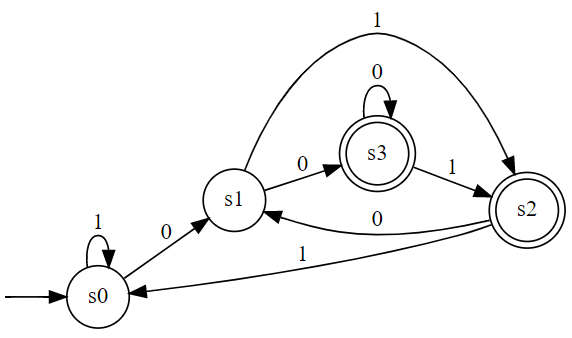

In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
This machine needs eight states --- four accept states plus four reject (non-accept) states.
'''))

### Exercise 9.13.4


This three-production grammar


`S` $\rightarrow$ `A1`

`A` $\rightarrow$ `A0`

`A` $\rightarrow \lambda$


generates the simple language consisting of any number of `0`s (including zero `0`s) followed by a single `1`. Build a state machine to model it.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Your machine should have exactly three states.
'''))

### Exercise 9.13.5


The machine in this figure recognizes which language?

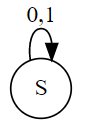


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
It's a very small language. Does it have an accept state?
'''))

## <font color=red>9.14 Tiny Computer</font>

### Exercise 9.14.1


Find another example of a small computer, one with fewer than 10 states.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
There are approximately five billion out there to find.
'''))

## <font color=red>9.15 Back and Forth</font>


### Exercise 9.15.1


Let `N` = `{S, A, B}`, `T` = `{0, 1}`, and `S` = `S`.


Find the language generated by the `(N, T, S, P)` grammar when the set `P` of productions is each of the following:


First


`S` $\rightarrow$ `AB`

`A` $\rightarrow$ `01`

`B` $\rightarrow$ `11`


Second

`S` $\rightarrow$ `AB`

`S` $\rightarrow$ `AA`

`A` $\rightarrow$ `0B`

`A` $\rightarrow$ `01`

`B` $\rightarrow$ `1`


Third


`S` $\rightarrow$ `AA`

`S` $\rightarrow$ `B`

`A` $\rightarrow$ `00A`

`A` $\rightarrow$ `00`

`B` $\rightarrow$ `1B`

`B` $\rightarrow$ `1`


Fourth


`S` $\rightarrow$ `AB`

`A` $\rightarrow$ `0A1`

`B` $\rightarrow$ `1B0`

`A` $\rightarrow \lambda$

`B` $\rightarrow \lambda$


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
If just staring at these fails to reveal the answers, use code from Exercise 9.7.1
that you've already seen to implement these grammars, and see how many strings they will generate.
'''))


### Exercise 9.15.2


Construct PSGs to generate each of the following languages:


First


$\{\mathtt{0}^{2n}\ |\ n \ge 0\}$.


Second


$\{\mathtt{0}^{n}\mathtt{1}^{2n}\ |\ n \ge 0\}$.


Third


$\{\mathtt{0}^{n}\mathtt{1}^{m}\mathtt{0}^{n}\ |\ m \ge 0,\ n \ge 0\}$.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
First

You can do this with two productions (with one of them being a recursive
production, and the other being a $\lambda$ production), but it might
be easier to try it with three productions.

Second

For this one, only two productions are needed.

Third

Only four productions are needed for this one.
'''))


## <font color=red>9.16 Taxonomy</font>


### Exercise 9.16.1


Find an example of each of the four types of grammars.


In [ ]:
#@title Hint{display-mode: "form"}
display(Markdown('''
Look at the examples in this chapter, or online for lots of others.
'''))


## <font color=red>9.17 Conclusion</font>


No exercises.
